In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

sns.set_theme()
plt.rc('font', family='Comic Sans MS')
sns.set_palette("Set2")

# Moore's Law

Microprocessor data from https://en.wikipedia.org/wiki/Transistor_count

Objective: Moore's law states that the number of transistors doubles every $m$ months (for comparable processors). We want to understand this and determine the exact number of months $m$.

Guide:
- First plot the number of transistors as a function of the year. This shows the exponential growth.
- Look at the number of transistors on a logarithmic scale (or explicitly compute the logarithm of the number of transistors before plotting).
- Model this data with a linear regression line and determine the slope of the regression line.
- Determine the information you are looking for from the slope. 

(Mathematical hint:
If you model the logarithmized $y$-values as a function of the $x$-values (for the sake of simplicity directly to the base $2$), this means
$$\log_2(y) = \beta_0 + \beta_1 \cdot x$$

Conversion to $y$ gives:
$$y = 2^{\beta_0 + \beta_1 \cdot x} = 2^{\beta_0} \cdot 2^{\beta_1 \cdot x}$$

This means that if you increase $x$ by one unit (in this case one year), $y$ (in this case the number of transistors) increases by a factor of $2^{\beta_1}$.
Or if you increase $x$ by $\frac{1}{\beta_1}$, y increases by a factor of 2. How large is $\frac{1}{\beta_1}$?)

In [2]:
microprocessors = pd.read_csv("microprocessors.csv")
microprocessors.head()

,Processor,transistor_count,year,Designer,Process (nm),Area (mm2),Transistor density (tr./mm2)
0,"MP944 (20-bit, 6-chip, 28 chips total)",74442,1970,Garrett AiResearch,?,?,?
1,"Intel 4004 (4-bit, 16-pin)",2250,1971,Intel,"10,000 nm",12 mm2,188
2,"TMX 1795 (8-bit, 24-pin)",3078,1971,Texas Instruments,?,30.64 mm2,100.5
3,"Intel 8008 (8-bit, 18-pin)",3500,1972,Intel,"10,000 nm",14 mm2,250
4,"NEC μCOM-4 (4-bit, 42-pin)",2500,1973,NEC,"7,500 nm[19]",?,?


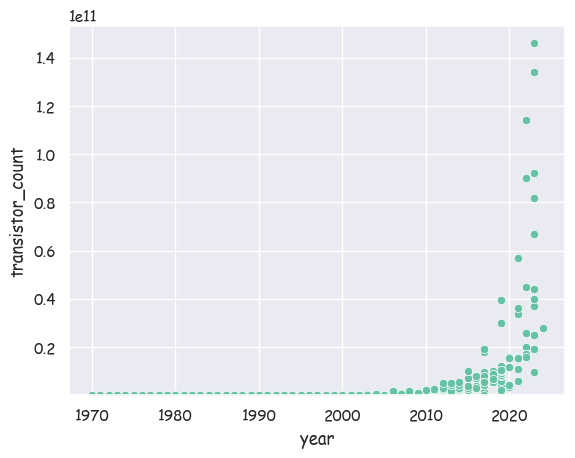

In [10]:
fig, ax = plt.subplots()
sns.scatterplot(microprocessors, x = "year", y = "transistor_count", ax = ax)
# ax.set(xlim = (0, None), ylim = (1900, None))
ax.set_ylim(bottom=1970)
plt.show()

In [13]:
microprocessors['log2_column'] = np.log2(microprocessors['transistor_count'])

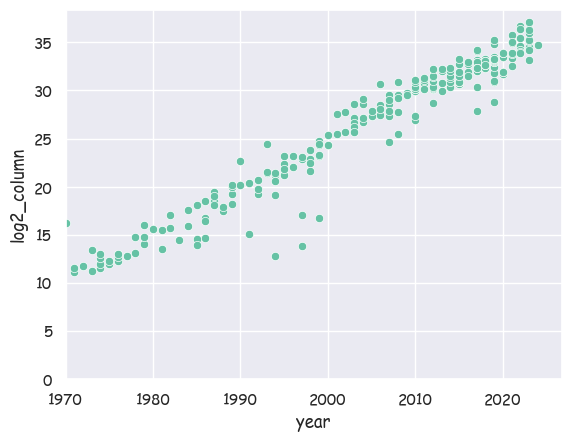

In [15]:
fig, ax = plt.subplots()
sns.scatterplot(microprocessors, x = "year", y = "log2_column", ax = ax)
ax.set(xlim = (1970, None), ylim = (0, None))
#ax.set_ylim(bottom=1970)
plt.show()

In [17]:
model = LinearRegression()
model.fit(X=microprocessors[["year"]], y = microprocessors["log2_column"])
print("Offset: ", model.intercept_)
print("Slope: ", model.coef_[0])

Offset:  -925.5796799721112
Slope:  0.47497481554151916


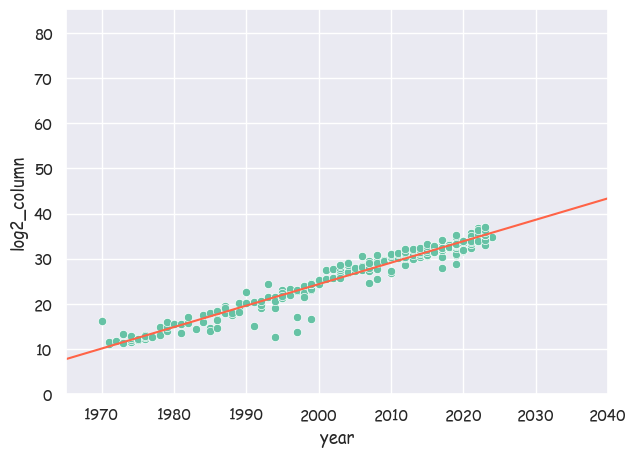

In [22]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.scatterplot(microprocessors, x = "year", y = "log2_column", ax = ax)
ax.axline(xy1=(0, model.intercept_), slope=model.coef_[0], color = "tomato")
ax.set(xlim = (1965, 2040), ylim = (0, None))
plt.show()